In [1]:
impo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\sangi\OneDrive\Desktop\ml\emotion_dataset.xlsx")

# checking for missing values

In [3]:
#checking for missing values
df.isnull().sum()

Emotion    0
Text       6
dtype: int64

# Visualization of data

In [4]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:>

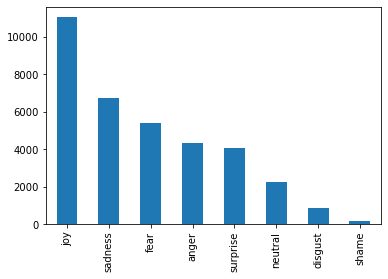

In [5]:
df['Emotion'].value_counts().plot(kind='bar')

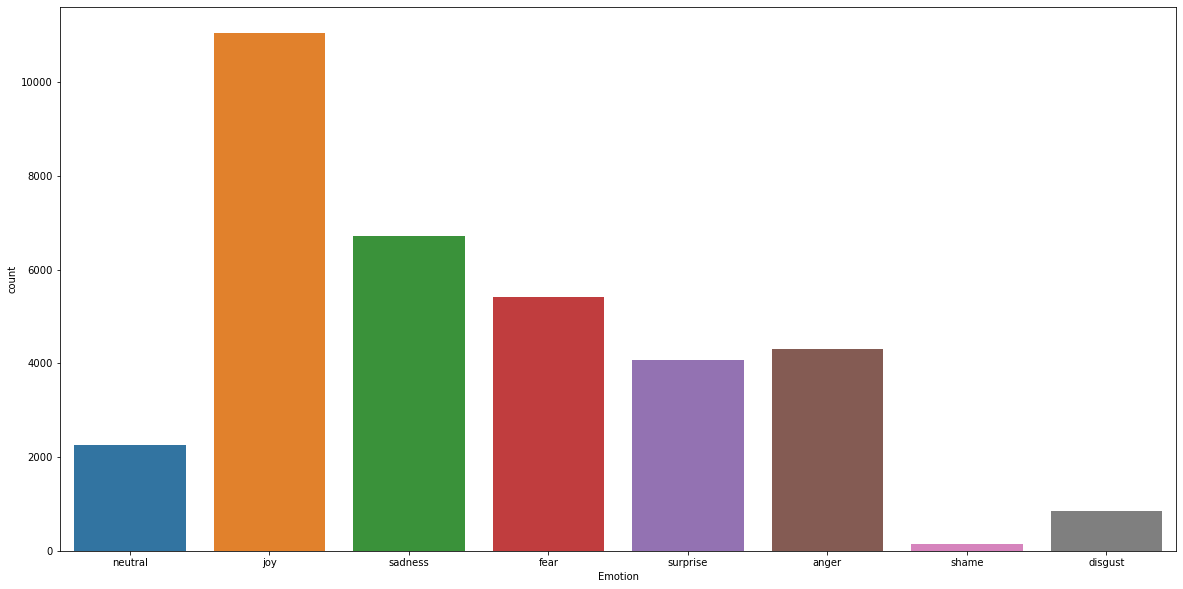

In [6]:
#using seaborn
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)
plt.show()

# sentiment analysis

In [7]:
from textblob import TextBlob

In [8]:
def get_sentiment(text):
    try:
        sentiment=TextBlob(text).sentiment.polarity
        if sentiment > 0:
            result="positive"
        elif sentiment < 0:
            result="negeive"
        else:
            result="neutral"
        return result
    except:
        return None

In [9]:
df['sentiment']=df['Text'].apply(get_sentiment)

In [10]:
df.head()

,Emotion,Text,sentiment
0,neutral,Why ?,neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,negeive
3,joy,Such an eye ! The true hazel eye-and so brill...,positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,neutral


sns.factorplot(x="Emotion",hue="sentiment",data=df,kind="count",size=6,aspect=1.5)

# CLEANING THE DATA

In [11]:
pip install neattext


Note: you may need to restart the kernel to use updated packages.


In [12]:
import neattext.functions as nfx

In [13]:
#DROPPING NULL VALUES
df. dropna( inplace = True )

In [14]:
#REMOVING USER_HANDLS
df['clean_text']=df['Text'].apply(nfx.remove_userhandles)

In [15]:
#REMOVING STOP WORDS
df['clean_text']=df['clean_text'].apply(nfx.remove_stopwords)

In [16]:
#REMOVING PUNCTUATIONS
df['clean_text']=df['clean_text'].apply(nfx.remove_punctuations)

In [17]:
df.head()

,Emotion,Text,sentiment,clean_text
0,neutral,Why ?,neutral,
1,joy,Sage Act upgrade on my to do list for tommorow.,neutral,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,negeive,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,positive,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,neutral,ugh babe hugggzzz u babe naamazed nga ako e b...


# key word extraction
##extract most common word in the class of emoion

In [18]:
from collections import Counter

In [19]:
def extract_keywords(text,num=50):
  token=[tok for tok in text.split()]
  most_comon_tokens=Counter(token).most_common(num)
  return dict(most_comon_tokens)

In [20]:
#list of emotion
emotion_list=df["Emotion"].unique().tolist()
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [21]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [22]:
#build features from text
X_feature=df["clean_text"]
y_label=df["Emotion"]
X_feature=X_feature.str.lower()
X_feature

0                                                         
1                           sage act upgrade list tommorow
2        way homegirl baby funeral man hate funerals sh...
3        eye  true hazel eyeand brilliant  regular feat...
4        ugh babe hugggzzz u  babe naamazed nga ako e b...
                               ...                        
34787           gift hope like it hand wear  itll warm lol
34788           world didnt meso world definitely cnt away
34789                                    man robbed today 
34790                            youu jealousy #losing you
34791                                think baby dream time
Name: clean_text, Length: 34785, dtype: object

In [23]:
#vectorizer
cv=CountVectorizer()
X=cv.fit_transform(X_feature)

In [24]:
cv.get_feature_names()

['00',
 '000',
 '000ã',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '100â',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ã',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12h

In [25]:
#split dataset
X_train,X_test,y_train,y_test=train_test_split(X,y_label,test_size=0.2,random_state=42)

# model_training for naive bayes


In [26]:
#model_training
nv_model=MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [27]:
#accuracy for naive bayes 
nv_model.score(X_test,y_test)

0.5763978726462555

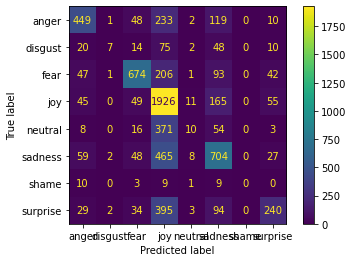

In [28]:
#plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nv_model,X_test,y_test)

# model for LogesticRegression

In [29]:
#model training
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

C:\Users\sangi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
#accuracy
lr_model.score(X_test,y_test)

0.6419433663935604

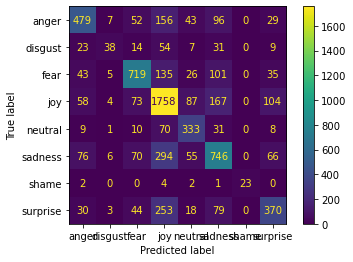

In [31]:
#plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr_model,X_test,y_test)

In [32]:
def predict_emotion(sample_text,model):
  myvect=cv.transform(sample_text).toarray()
  prediction=nv_model.predict(myvect)
  predic_proba=nv_model.predict_proba(myvect)
  predic_percentage_for_all=dict(zip(model.classes_,predic_proba[0]))
  print("prediction:{},Prediction score:{}".format(prediction[0],np.max(predic_proba)))
  return predic_percentage_for_all

# prediction and accurancy  for naive bayes


In [44]:
sample_text=["i hate this subject"]
sample_text2=["i love this food so much!"]
sample_text3=["why do you think that he will miss the train?"]

In [45]:
predict_emotion(sample_text,nv_model)

prediction:anger,Prediction score:0.3744773855989114


{'anger': 0.3744773855989114,
 'disgust': 0.0027752874575074538,
 'fear': 0.19070058482422617,
 'joy': 0.11928438466645476,
 'neutral': 0.00015968853516628946,
 'sadness': 0.3024684683650573,
 'shame': 6.5307812689465115e-06,
 'surprise': 0.0101276697714095}

In [46]:
predict_emotion(sample_text2,nv_model)

prediction:joy,Prediction score:0.6099083659686025


{'anger': 0.01634658649252261,
 'disgust': 4.118903337323852e-05,
 'fear': 0.06157213357250074,
 'joy': 0.6099083659686025,
 'neutral': 9.406956290706877e-06,
 'sadness': 0.3083574329047041,
 'shame': 1.082678031787617e-08,
 'surprise': 0.0037648742452282154}

In [47]:
predict_emotion(sample_text3,nv_model)

prediction:sadness,Prediction score:0.6948944451550884


{'anger': 0.059690313677791554,
 'disgust': 2.0708957099771184e-05,
 'fear': 0.024255589067605977,
 'joy': 0.21596636382493772,
 'neutral': 4.317046503432174e-08,
 'sadness': 0.6948944451550884,
 'shame': 1.6185265169914957e-10,
 'surprise': 0.005172535985160517}

# prediction for LogesticRegression

In [49]:
predict_emotion(sample_text,lr_model)

prediction:anger,Prediction score:0.3744773855989114


{'anger': 0.3744773855989114,
 'disgust': 0.0027752874575074538,
 'fear': 0.19070058482422617,
 'joy': 0.11928438466645476,
 'neutral': 0.00015968853516628946,
 'sadness': 0.3024684683650573,
 'shame': 6.5307812689465115e-06,
 'surprise': 0.0101276697714095}

In [50]:
predict_emotion(sample_text2,nv_model)

prediction:joy,Prediction score:0.6099083659686025


{'anger': 0.01634658649252261,
 'disgust': 4.118903337323852e-05,
 'fear': 0.06157213357250074,
 'joy': 0.6099083659686025,
 'neutral': 9.406956290706877e-06,
 'sadness': 0.3083574329047041,
 'shame': 1.082678031787617e-08,
 'surprise': 0.0037648742452282154}

In [51]:
predict_emotion(sample_text3,lr_model)

prediction:sadness,Prediction score:0.6948944451550884


{'anger': 0.059690313677791554,
 'disgust': 2.0708957099771184e-05,
 'fear': 0.024255589067605977,
 'joy': 0.21596636382493772,
 'neutral': 4.317046503432174e-08,
 'sadness': 0.6948944451550884,
 'shame': 1.6185265169914957e-10,
 'surprise': 0.005172535985160517}

In [1]:
import os
os.getcwd()

'C:\\Users\\sangi'